In [1]:
#pip install --upgrade mne

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mne
import os





## BrainVision (.vhdr, .vmrk, .eeg)

The BrainVision file format consists of three separate files:

1. A text header file (``.vhdr``) containing meta data.
2. A text marker file (``.vmrk``) containing information about events in the
   data.
3. A binary data file (``.eeg``) containing the voltage values of the EEG.

Both text files are based on the [INI format](https://en.wikipedia.org/wiki/INI_file)
consisting of

* sections marked as ``[square brackets]``,
* comments marked as ``; comment``,
* and key-value pairs marked as ``key=value``.

Brain Products provides documentation for their core BrainVision file format.
The format specification is hosted on the
[Brain Products website](https://www.brainproducts.com/support-resources/brainvision-core-data-format-1-0/).

BrainVision EEG files can be read using :func:`mne.io.read_raw_brainvision`,
passing the ``.vhdr`` header file as the argument.

In [3]:
VHDR = 'Exp_Mediation_Paradigm1_Perception_vp01.vhdr'
EEG = 'Exp_Mediation_Paradigm1_Perception_vp01.eeg'
VRMK = 'Exp_Mediation_Paradigm1_Perception_vp01.vrmk'

In [4]:
raw = mne.io.read_raw_brainvision(VHDR)

Extracting parameters from Exp_Mediation_Paradigm1_Perception_vp01.vhdr...
Setting channel info structure...


C:\Users\George\AppData\Local\Temp\ipykernel_18412\1713186092.py:1: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(VHDR)
C:\Users\George\AppData\Local\Temp\ipykernel_18412\1713186092.py:1: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(VHDR)


In [5]:
raw

<RawBrainVision | Exp_Mediation_Paradigm1_Perception_vp01.eeg, 69 x 658280 (658.3 s), ~61 kB, data not loaded>

In [6]:
type(raw)

mne.io.brainvision.brainvision.RawBrainVision

Using matplotlib as 2D backend.


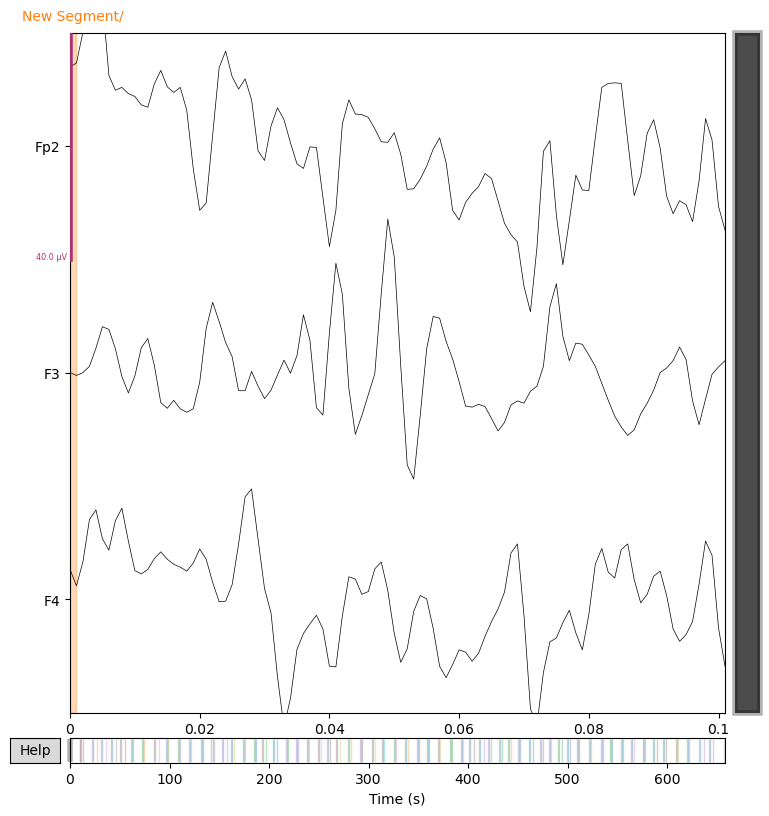

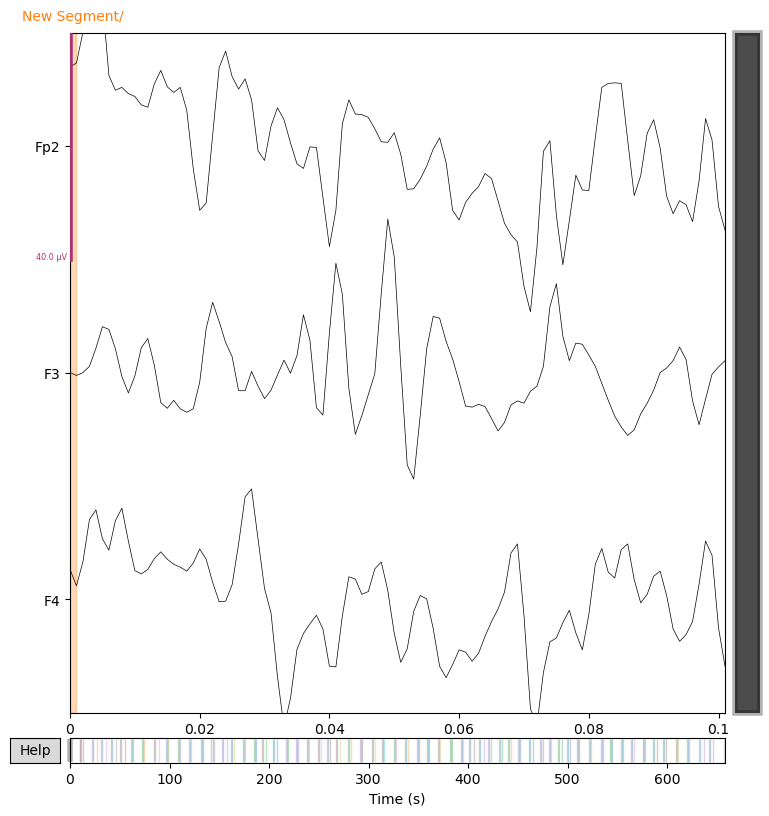

In [7]:
raw.plot(n_channels=10,duration=0.1,order = [1,2,3])

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\George\AppData\Local\Temp\ipykernel_18412\2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
C:\Users\George\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


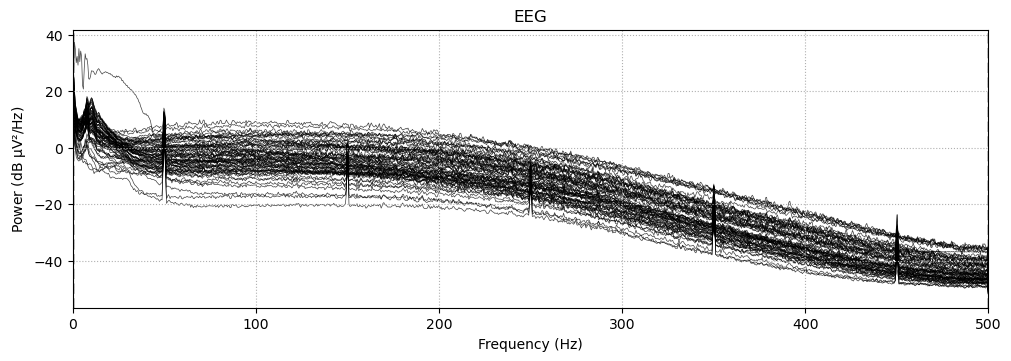

In [8]:
raw.plot_psd()

In [9]:
raw.crop()

<RawBrainVision | Exp_Mediation_Paradigm1_Perception_vp01.eeg, 69 x 658280 (658.3 s), ~61 kB, data not loaded>

In [10]:
data = raw.get_data()

In [11]:
data

array([[ 8.92e-05,  9.14e-05,  9.24e-05, ...,  9.44e-05,  9.13e-05,
         8.96e-05],
       [ 7.66e-05,  7.73e-05,  8.28e-05, ...,  8.47e-05,  7.32e-05,
         6.02e-05],
       [ 7.27e-05,  7.22e-05,  7.27e-05, ...,  6.27e-05,  6.75e-05,
         7.50e-05],
       ...,
       [ 3.34e-05,  3.61e-05,  4.19e-05, ...,  3.82e-05,  3.39e-05,
         3.75e-05],
       [ 1.84e-05,  2.12e-05,  1.93e-05, ...,  8.90e-06,  7.20e-06,
         3.20e-06],
       [-2.60e-06, -3.39e-05, -6.73e-05, ..., -6.40e-05, -6.44e-05,
        -6.56e-05]])

In [12]:
print(data.shape)# Вывод формы массива (количество каналов, количество отсчетов)

(69, 658280)


In [13]:
data[0]

array([8.92e-05, 9.14e-05, 9.24e-05, ..., 9.44e-05, 9.13e-05, 8.96e-05])

In [14]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment/10', 'Comment/20', 'Comment/30', 'Comment/40', 'Comment/50', 'Comment/60', 'Comment/70', 'Comment/80', 'Comment/90', 'Laser/L  1', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  5', 'Stimulus/S  6']


In [15]:
events

array([[     0,      0,  99999],
       [ 10029,      0,      5],
       [ 10053,      0,      3],
       [ 11056,      0,  10010],
       [ 13080,      0,  10005],
       [ 21613,      0,      2],
       [ 22617,      0,  10010],
       [ 26840,      0,  10002],
       [ 31231,      0,      2],
       [ 32236,      0,  10010],
       [ 36160,      0,  10006],
       [ 40791,      0,      3],
       [ 41797,      0,  10010],
       [ 46080,      0,  10007],
       [ 50059,      0,      3],
       [ 51066,      0,  10010],
       [ 55760,      0,  10005],
       [ 60952,      0,      2],
       [ 61957,      0,  10010],
       [ 62880,      0,  10003],
       [ 72012,      0,      1],
       [ 73017,      0,  10010],
       [ 73960,      0,  10002],
       [ 84263,      0,      3],
       [ 85267,      0,  10010],
       [ 89240,      0,  10006],
       [ 96624,      0,      2],
       [ 97636,      0,  10010],
       [ 98920,      0,  10003],
       [108375,      0,      1],
       [10

In [16]:
event_id

{'Comment/10': 10001,
 'Comment/20': 10002,
 'Comment/30': 10003,
 'Comment/40': 10004,
 'Comment/50': 10005,
 'Comment/60': 10006,
 'Comment/70': 10007,
 'Comment/80': 10008,
 'Comment/90': 10009,
 'Laser/L  1': 10010,
 'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  5': 5,
 'Stimulus/S  6': 6}

In [17]:
pain_id = [10001,10002,10003,10004,10005,10006,10007,10008,10009]

In [18]:
len(data[0])

658280

In [19]:
type(data[0])

numpy.ndarray

In [20]:
type(data[0][0])

numpy.float64

In [21]:
time_array = [i for i in range(658280)]
for i in range(658280):
    time_array[i] = [i,0,data[0][i]] 

In [22]:
for event in events:
    if event[2] in pain_id:
        time_array[event[0]][1] = 1

In [23]:
data_in_np = np.array(time_array)

In [24]:
df2 = pd.DataFrame(data_in_np,columns=['Time', 'Pain', 'Voltage'])

In [25]:
df2

,Time,Pain,Voltage
0,0.0,0.0,0.000089
1,1.0,0.0,0.000091
2,2.0,0.0,0.000092
3,3.0,0.0,0.000100
4,4.0,0.0,0.000110
...,...,...,...
658275,658275.0,0.0,0.000128
658276,658276.0,0.0,0.000108
658277,658277.0,0.0,0.000094
658278,658278.0,0.0,0.000091


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658280 entries, 0 to 658279
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     658280 non-null  float64
 1   Pain     658280 non-null  float64
 2   Voltage  658280 non-null  float64
dtypes: float64(3)
memory usage: 15.1 MB


In [27]:
df2[df2['Pain'] == 1]

,Time,Pain,Voltage
13080,13080.0,1.0,0.000083
26840,26840.0,1.0,0.000116
36160,36160.0,1.0,0.000085
46080,46080.0,1.0,0.000068
55760,55760.0,1.0,0.000078
62880,62880.0,1.0,0.000026
73960,73960.0,1.0,0.000007
89240,89240.0,1.0,0.000090
98920,98920.0,1.0,-0.000015
110440,110440.0,1.0,0.000048


# Построение изображений 


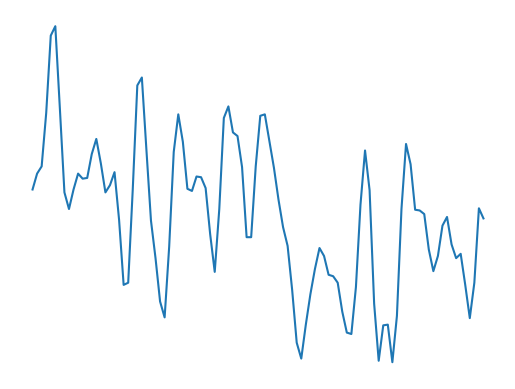

In [48]:
#пример сохранения изображения 
plt.plot(df2['Voltage'][0:100])
plt.axis('off')
plt.savefig('my_plot.png', dpi=500, bbox_inches='tight')
plt.show()

In [46]:
df2.iloc[1]['Pain']

0.0

In [50]:
# Путь к папке для сохранения файлов
save_dir = 'output_images'

# Создание папки, если её нет
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [52]:
for i in range(6583):  # Шаг 100 -> 658280 / 100 = 6583
    plt.plot(df2['Voltage'][i*100:(i+1)*100])
    plt.axis('off')
    file_name = f'signal_{i}_pain_{df2.iloc[i*100]["Pain"]}.png'
    file_path = os.path.join(save_dir, file_name)
    plt.savefig(file_path, dpi=300, bbox_inches='tight', format='png')  # Размер примерно 256x256
    plt.clf()  # Очищает текущую фигуру для следующего графика